###### Задание 1
- Скачайте с [сайта](https://grouplens.org/datasets/movielens/) датасет любого размера. Определите какому фильму было выставлено больше всего оценок 5.0.

In [1]:
#Решение по Заданию 1
import pandas as pd
MOVIES = "source/ml-latest-small/movies.csv"
RATINGS = "source/ml-latest-small/ratings.csv"

df_join_movies_ratings = pd.read_csv(MOVIES).merge(pd.read_csv(RATINGS), how = 'inner', on = 'movieId')

# df_movies_greate - фрейм с фильмами оцененными на 5, сгруппированные по количеству оценок
df_movies_greate = (df_join_movies_ratings[(df_join_movies_ratings['rating'] == 5)].
                    groupby(['title'])['userId'].
                    count().
                    reset_index())

#нахождение фильма которому высталено больше всего оценок 5
print('Фильм которому высталено больше всего оценок 5.0:')
df_movies_greate[(df_movies_greate['userId'] == df_movies_greate['userId'].max())]



Фильм которому высталено больше всего оценок 5.0:


,title,userId
2310,"Shawshank Redemption, The (1994)",153


##### Задание 2
- По данным файла power.csv посчитайте суммарное потребление стран Прибалтики (Латвия, Литва и Эстония) категорий 4, 12 и 21 за период с 2005 по 2010 года. Не учитывайте в расчетах отрицательные значения quantity.

In [2]:
df_power = pd.read_csv('source/power.csv')

print( 'Cуммарное потребление стран Прибалтики (Латвия, Литва и Эстония) категорий 4, 12 и 21 за период с 2005 по 2010 года:',
        df_power[( df_power['country' ].isin   (['Latvia', 'Lithuania', 'Estonia']) 
               &   df_power['category'].isin   ([4,12,21]) 
               &   df_power['year'    ].between(2005,2010))
               &  (df_power['quantity'] > 0)]['quantity'].sum() )

Cуммарное потребление стран Прибалтики (Латвия, Литва и Эстония) категорий 4, 12 и 21 за период с 2005 по 2010 года: 240580.0


###### Задание 3
- Выберите страницу любого сайта с табличными данными. Импортируйте таблицы в pandas dataframe.

   number   country         ill     dead  recovered  rate_thousand
0       1       США  10 728 497  244 304  4 095 146          32.37
1       2     Индия   8 728 795  128 668  8 115 580           6.36
2       3  Бразилия   5 810 652  164 737  5 274 812          27.46
3       4   Франция   1 915 677   42 600    139 760          27.82
4       5    РОССИЯ   1 903 253   32 834  1 425 529          12.97 



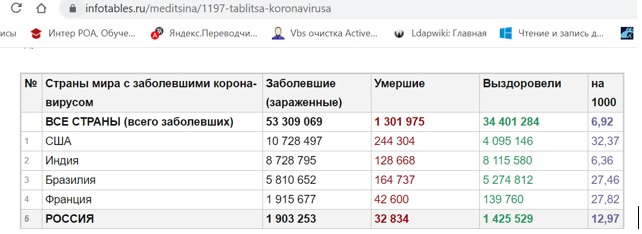

In [3]:
from IPython.display import Image

page_url = 'https://infotables.ru/meditsina/1197-tablitsa-koronavirusa'
df = pd.read_html(page_url, 
                  encoding='utf-8',
                  skiprows = 2, 
                  attrs = {'class':'tables90'},
                  decimal = ',')[0].\
     rename(columns = {0:'number', 1:'country', 2:'ill', 3:'dead', 4:'recovered', 5:'rate_thousand'})

#При четении html не применяется параметр decimal = ',' 
#дополнительная операция преобразования в число и выделение дробной части
df['rate_thousand'] = pd.to_numeric(df['rate_thousand'].str.replace(' ', ''), errors = 'coerce')/100

print(df.head(), '\n')

Image('source/Table_CoV.jpg')